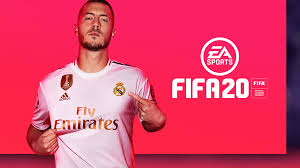

In [304]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [305]:
import warnings
warnings.simplefilter("ignore")

In [306]:
n_clusters=5

In [307]:
data1=pd.read_csv(r'C:\Users\tarandeepsingh1\Downloads\Vision\FIFA Project\Database\Training_Data.csv')

In [308]:
data1.isnull().sum()

short_name                      0
age                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
team_position                 223
nation_position             16666
pace                         1986
shooting                     1986
passing                      1986
dribbling                    1986
defending                    1986
physic                       1986
gk_diving                   15784
gk_handling                 15784
gk_kicking                  15784
gk_reflexes                 15784
gk_speed                    15784
gk_positioning

In [309]:
#Seems that outfield players' goalkeeping attributes and
# goalkeepers' outfield attributes are zero
outfield_att=['pace','shooting','passing','dribbling','defending','physic']
goalkeeper_att=['gk_diving','gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed','gk_positioning']
data1[outfield_att]=data1[outfield_att].fillna(0)
data1[goalkeeper_att]=data1[goalkeeper_att].fillna(0)

In [310]:
data1.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,405000,...,81.0,89.0,35.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0
1,L. Messi,31,170,72,Argentina,FC Barcelona,94,94,110500000,565000,...,88.0,96.0,32.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Neymar Jr,26,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,...,83.0,95.0,32.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0
3,De Gea,27,193,76,Spain,Manchester United,91,93,72000000,260000,...,0.0,0.0,0.0,0.0,90.0,85.0,87.0,94.0,58.0,88.0
4,K. De Bruyne,27,181,70,Belgium,Manchester City,91,92,102000000,355000,...,92.0,87.0,60.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0


In [311]:
#As an Ultimate Team manager, I'm not interestd in players with overall <=65:
data=data1[data1.overall>65]

In [312]:
#Choosing two variables to distinguish players: Age and Overall Rating
train=data[['age','overall','potential']]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9665 entries, 0 to 9664
Data columns (total 3 columns):
age          9665 non-null int64
overall      9665 non-null int64
potential    9665 non-null int64
dtypes: int64(3)
memory usage: 302.0 KB


In [313]:
train.describe()

,age,overall,potential
count,9665.000000,9665.000000,9665.000000
mean,26.907915,71.293430,74.182100
std,4.144508,4.465512,5.286196
min,17.000000,66.000000,66.000000
25%,24.000000,68.000000,70.000000
50%,27.000000,70.000000,74.000000
75%,30.000000,74.000000,78.000000
max,45.000000,94.000000,95.000000


I am looking for 3 types of players: 
    
    i. Young players with high potential. (Usually low wage demands)
    
    ii. Players in their mid-career with high rating. (Medium-High Wage Demands).
    
    iii. Experienced players with high rating who can be relied on in critical situations. ( Short Term Contracts with Medium-High Wage Demands)

Lets plot features against each other to see if we can find what we're looking for.

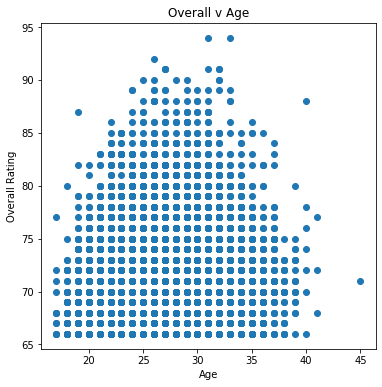

In [314]:
#Lets see how do these features look when pitted against each other
plt.figure(figsize=(6, 6))
plt.scatter(train.age,train.overall)
plt.ylabel('Overall Rating')
plt.xlabel('Age')
plt.title('Overall v Age')
plt.savefig('Age_vs_OverallRating.png')
plt.show()


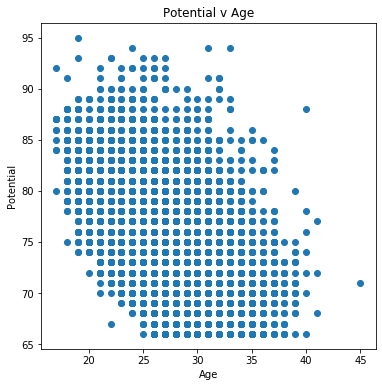

In [315]:
#Lets see how do these features look when pitted against each other
plt.figure(figsize=(6, 6))
plt.scatter(train.age,train.potential)
plt.ylabel('Potential')
plt.xlabel('Age')
plt.title('Potential v Age')
plt.savefig('Age_vs_Potential.png')
plt.show()


From the above graph we can conclude that:
1. Most high rating lies in the 25-30 years of age group
2. We do have young players with high potential and medium-high overall rating
3. We have a plethora of experienced players in age 30-35 with high overall

Let us prepare the data now:
    
We will use Standard Scaler on each of these features since kmeans works well on columns with 0 mean.

In [316]:
std_scale=preprocessing.StandardScaler()
df=pd.DataFrame(std_scale.fit_transform(train),columns=train.columns)

In [317]:
df.head(10)

,age,overall,potential
0,1.469993,5.085138,3.749185
1,0.987402,5.085138,3.749185
2,-0.219076,4.637238,3.560003
3,0.022220,4.413288,3.560003
4,0.022220,4.413288,3.370821
5,1.228698,4.413288,3.181640
6,0.987402,4.413288,3.181640
7,1.228698,4.413288,3.181640
8,0.022220,4.413288,3.181640
9,-0.460372,4.189338,3.560003


In [318]:
kmeans=KMeans(n_clusters=n_clusters, random_state=1)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [319]:
predictions=kmeans.labels_
data['Group']=0
for i in range(len(train)):
    data.loc[i,'Group']=predictions[i]
train.head()

,age,overall,potential
0,33,94,94
1,31,94,94
2,26,92,93
3,27,91,93
4,27,91,92


In [320]:
#Sorting data wrt given cluster number
data=data.sort_values('Group')
data.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,Group
0,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,405000,...,89.0,35.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0
689,R. Pereyra,27,182,77,Argentina,Watford,79,79,13000000,61000,...,81.0,61.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0
691,G. Burgstaller,29,187,80,Austria,FC Schalke 04,79,79,12500000,41000,...,73.0,38.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0
692,André Almeida,27,185,80,Portugal,SL Benfica,79,79,10500000,14000,...,75.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0
693,Borja García,27,175,72,Spain,Girona FC,79,79,13000000,35000,...,79.0,60.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [321]:
#Saving data for different clusters to see how does kmeans differentiate them
data.to_csv('kmeans_result_'+str(n_clusters)+'.csv')